In [2]:
#import pandas
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes.csv", header=None, names=col_names)

In [3]:
pima=pima[1:]
pima = pima.apply(pd.to_numeric, errors='coerce')
pima.head()


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [17]:
pip install statsmodels


  Using cached patsy-0.5.6-py2.py3-none-any.whl.metadata (3.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 9.0 MB/s eta 0:00:0000:010:01
Using cached patsy-0.5.6-py2.py3-none-any.whl (233 kB)
Note: you may need to restart the kernel to use updated packages.


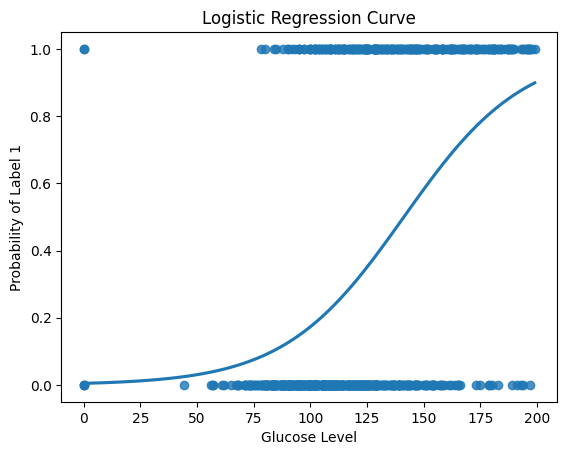

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt


# Plot logistic regression curve
sns.regplot(x='glucose', y='label', data=pima, logistic=True, ci=None)

# Add labels and title
plt.xlabel('Glucose Level')
plt.ylabel('Probability of Label 1')
plt.title('Logistic Regression Curve')

# Show the plot
plt.show()


In [5]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable
y

1      1
2      0
3      1
4      0
5      1
      ..
764    0
765    0
766    0
767    1
768    0
Name: label, Length: 768, dtype: int64

In [6]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [7]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[115,  10],
       [ 25,  42]])

In [9]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.82      0.92      0.87       125
   with diabetes       0.81      0.63      0.71        67

        accuracy                           0.82       192
       macro avg       0.81      0.77      0.79       192
    weighted avg       0.82      0.82      0.81       192



Accuracy:  81.77083333333334


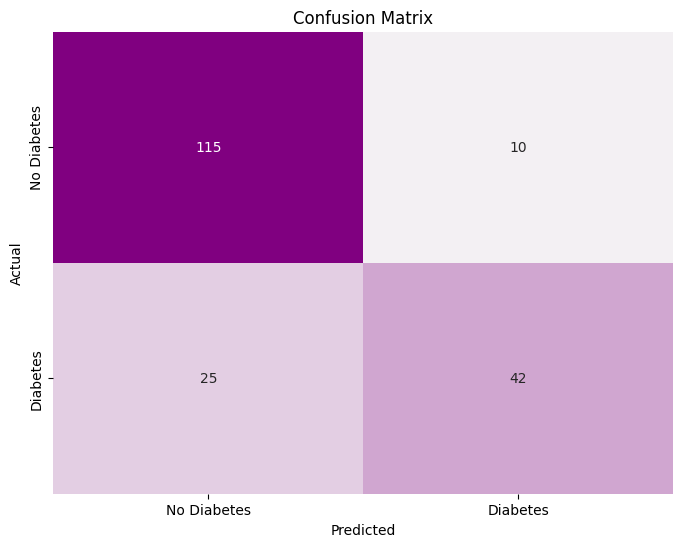

In [10]:
print("Accuracy: ", logreg.score(X_test, y_test) * 100)
custom_cmap = sns.light_palette("purple", as_cmap=True)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, fmt="d", cmap=custom_cmap, cbar=False,
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [11]:
# import matplotlib.pyplot as plt

# example = logreg.predict(([[6,89,26.5,55,123,66,0.675]]))
# print(example)

# # Using matplotlib to plot the visualization
# X_new = [[6,89,26.5,55,123,66,0.675]]
# y_prob = logreg.predict_proba([[6,89,26.5,55,123,66,0.675]])
# print(y_prob)
# plt.plot(X_new, y_prob)
# plt.show()
y_test

516    1
463    0
56     0
685    0
384    0
      ..
165    1
572    0
305    0
59     0
293    1
Name: label, Length: 192, dtype: int64

In [12]:
df=X_test
df

,pregnant,insulin,bmi,age,glucose,bp,pedigree
516,3,105,31.6,28,163,70,0.268
463,8,49,35.3,39,74,70,0.705
56,1,0,23.0,21,73,50,0.248
685,5,0,0.0,69,136,82,0.640
384,1,59,25.1,25,90,62,1.268
...,...,...,...,...,...,...,...
165,0,0,31.6,32,131,88,0.743
572,2,0,22.6,21,130,96,0.268
305,3,0,21.0,37,150,76,0.207
59,0,0,40.5,44,146,82,1.781


In [13]:
df['y_pred']=y_pred
df['y_test']=y_test
df

,pregnant,insulin,bmi,age,glucose,bp,pedigree,y_pred,y_test
516,3,105,31.6,28,163,70,0.268,1,1
463,8,49,35.3,39,74,70,0.705,0,0
56,1,0,23.0,21,73,50,0.248,0,0
685,5,0,0.0,69,136,82,0.640,0,0
384,1,59,25.1,25,90,62,1.268,0,0
...,...,...,...,...,...,...,...,...,...
165,0,0,31.6,32,131,88,0.743,0,1
572,2,0,22.6,21,130,96,0.268,0,0
305,3,0,21.0,37,150,76,0.207,0,0
59,0,0,40.5,44,146,82,1.781,1,0


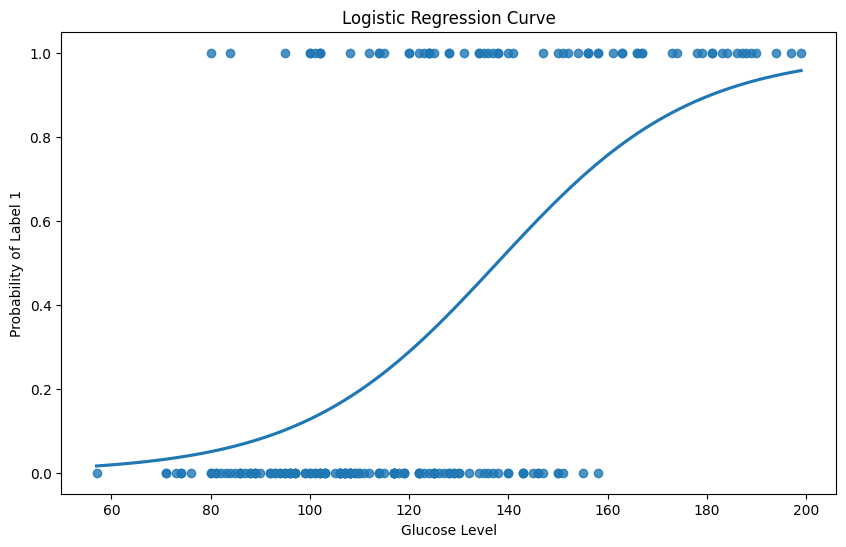

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already defined 'glucose' and 'label'
# (glucose: glucose levels, label: predicted probabilities)

def plot_logistic_regression_curve(x, y):
    plt.figure(figsize=(10, 6))
    sns.regplot(x=x, y=y, data=df, logistic=True, ci=None)
    plt.xlabel('Glucose Level')
    plt.ylabel('Probability of Label 1')
    plt.title('Logistic Regression Curve')
    plt.show()

plot_logistic_regression_curve('glucose', 'y_test')
